In [15]:
# Tugas klasifikasi
## Rahmat Sunjani [ 55201120030 ]
## Putri Avrilya [ 55201120030 ]

In [16]:
import pandas as pd
url = '../kaggle-survey-2022/kaggle_survey_2022_responses.csv'
df = pd.read_csv(url)
df = df.rename(columns= {'Duration (in seconds)':'Q1'})

C:\Users\INTEL\AppData\Local\Temp\ipykernel_8568\3980851348.py:3: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [17]:
## change to view all collum use
df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_7', 'Q6_8', 'Q11', 'Q12_4', 'Q13_5', 'Q23', 'Q24', 'Q31_1', 'Q44_1']]

In [18]:
## change name to view all collum use
df = df.rename(columns={'Q1':'duration', 'Q2':'age', 'Q3':'gender', 'Q4':'country', 'Q5':'educational_status','Q6_1':'coursera', 'Q6_2':'edX', 'Q6_3':'kaggle', 'Q6_4':'datacamp', 'Q6_7':'udemy', 'Q6_8':'linkedIn', 'Q11':'writing_code_year', 'Q12_4':'programming_languages', 'Q13_5':'IDE', 'Q23':'current_role', 'Q24':'current_industry', 'Q31_1':'cloud_computing', 'Q44_1':'favorite_media_sources'})[1:]

In [19]:
courses = df[['coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]
courses#.columns.tolist()


,coursera,edX,kaggle,datacamp,udemy,linkedIn
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Coursera,edX,NaN,DataCamp,Udemy,LinkedIn Learning
4,Coursera,NaN,Kaggle Learn Courses,NaN,Udemy,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
23993,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,NaN,NaN
23995,NaN,NaN,NaN,DataCamp,Udemy,NaN
23996,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN


In [20]:
# cek data null atau kosong ( namun data lain bisa digunakan )
df.isna().sum()

duration                      0
age                           0
gender                        0
country                       0
educational_status            0
coursera                  14298
edX                       21523
kaggle                    17369
datacamp                  20279
udemy                     17881
linkedIn                  21231
writing_code_year           754
programming_languages     20196
IDE                       17898
current_role              13367
current_industry          14903
cloud_computing           21651
favorite_media_sources    20002
dtype: int64

In [21]:
# Cek Data Type
df.dtypes

duration                  object
age                       object
gender                    object
country                   object
educational_status        object
coursera                  object
edX                       object
kaggle                    object
datacamp                  object
udemy                     object
linkedIn                  object
writing_code_year         object
programming_languages     object
IDE                       object
current_role              object
current_industry          object
cloud_computing           object
favorite_media_sources    object
dtype: object

country                 
India                       8792
United States of America    2920
Other                       1430
Brazil                       833
Nigeria                      731
dtype: int64
duration
230         59
303         57
264         57
272         54
249         53
dtype: int64
        age gender educational_status duration                   country
166   18-21  Woman                Yes      264                     India
586   18-21    Man                Yes      264                     India
802   18-21    Man                Yes      303  United States of America
856   25-29    Man                Yes      230  United States of America
1167  18-21    Man                Yes      264                     India


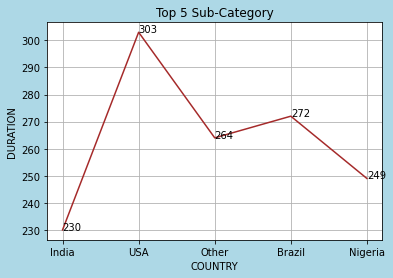

In [22]:
## 1. Menampilkan data 'age', 'gender', 'educational_status' berdasarkan 3 duration terlama dan 3 country terbanyak.
soal_1 = df[['age', 'gender', 'educational_status', 'country', 'duration']]
# CARI DATA COUNTRY
country_10 = soal_1[['country']].value_counts().head(5)
print(country_10)
# CARI DATA DURATION
duration = soal_1[['duration']].value_counts().head(5)
print(duration)

answer = soal_1.loc[((df['country'] == 'India')|(df['country'] == 'United States of America')|(df['country'] == 'Other')) & ((df['duration'] == '230')|(df['duration'] == '303')|(df['duration'] == '264'))]
print(answer[['age', 'gender', 'educational_status', 'duration', 'country']])

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.patch.set_facecolor('lightblue')  # type: ignore

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
x = ['India','USA','Other','Brazil','Nigeria']
y = np.array([230,303,264,272,249])
plt.xlabel('COUNTRY')
plt.ylabel('DURATION')
plt.title('Top 5 Sub-Category')
plt.grid(True)

plt.plot(x, y,color='brown')
addlabels(x, y)
plt.show()

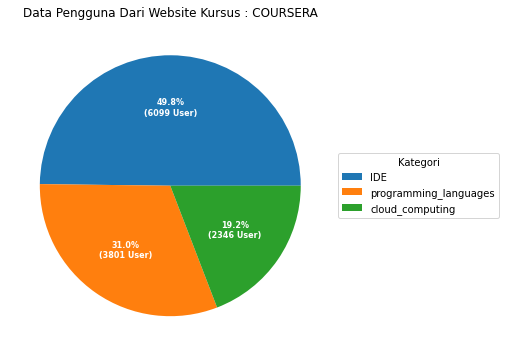

In [23]:
# 2. Menampilkan data IDE, programming_languages, dan cloud_computing berdasarkan platsforms_courses.
soal_2 = df[['IDE', 'programming_languages', 'cloud_computing', 'coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]

# DATA COURSERA
coursera = soal_2[(df['coursera'] != 'NaN')]
coursera = coursera[['IDE', 'programming_languages', 'cloud_computing', 'coursera']]

coursera.count()

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

coursera = ["IDE                       6099", "programming_languages     3801", "cloud_computing           2346"]
data = [float(x.split()[-1]) for x in coursera]
ingredients = [x.split()[0] for x in coursera]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} User)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.legend(wedges, ingredients, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Data Pengguna Dari Website Kursus : COURSERA")
plt.show()


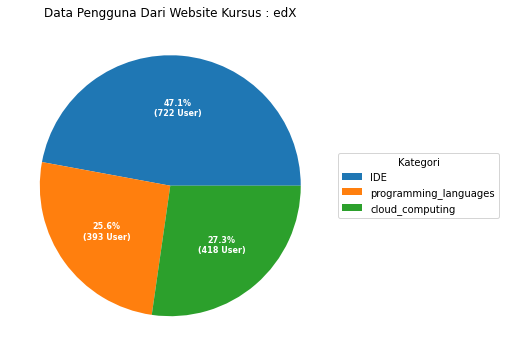

In [24]:
# DATA EDX
edX = soal_2[(df['edX'] == 'edX')]
edX = edX[['IDE', 'programming_languages', 'cloud_computing', 'edX']]

edX.count()

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

edX = ["IDE                       722", "programming_languages     393", "cloud_computing           418"]
data = [float(x.split()[-1]) for x in edX]
ingredients = [x.split()[0] for x in edX]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} User)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.legend(wedges, ingredients, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Data Pengguna Dari Website Kursus : edX")
plt.show()


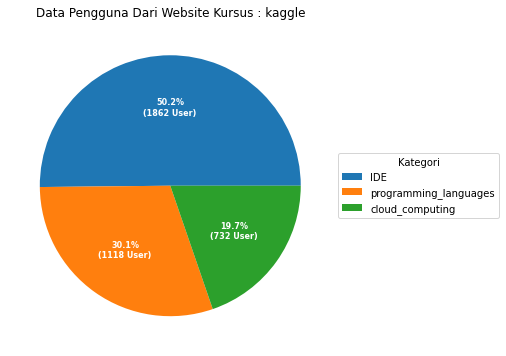

In [25]:
# DATA KAGGLE
kaggle = soal_2[(df['kaggle'] == 'Kaggle Learn Courses')]
kaggle = kaggle[['IDE', 'programming_languages', 'cloud_computing', 'kaggle']]
kaggle.count()

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

kaggle = ["IDE                      1862", "programming_languages    1118", "cloud_computing           732"]
data = [float(x.split()[-1]) for x in kaggle]
ingredients = [x.split()[0] for x in kaggle]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} User)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.legend(wedges, ingredients, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Data Pengguna Dari Website Kursus : kaggle")
plt.show()

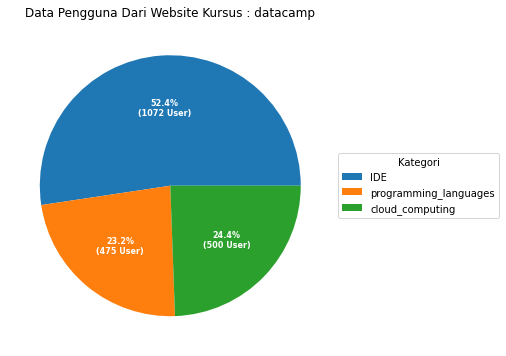

In [26]:
# DATA DATACAMP
datacamp = soal_2[(df['datacamp'] == 'DataCamp')]
datacamp = datacamp[['IDE', 'programming_languages', 'cloud_computing', 'datacamp']]
datacamp.count()

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

datacamp = ["IDE                      1072", "programming_languages     475", "cloud_computing           500"]
data = [float(x.split()[-1]) for x in datacamp]
ingredients = [x.split()[0] for x in datacamp]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} User)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.legend(wedges, ingredients, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Data Pengguna Dari Website Kursus : datacamp")
plt.show()

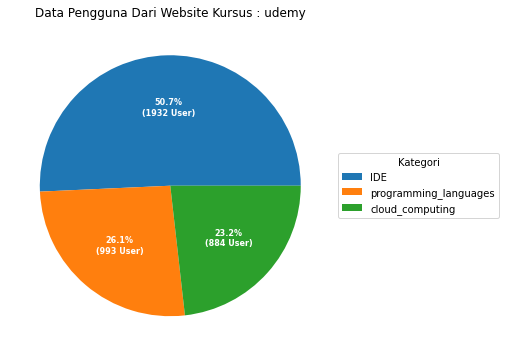

In [27]:
# DATA UDEMY
udemy = soal_2[(df['udemy'] == 'Udemy')]
udemy = udemy[['IDE', 'programming_languages', 'cloud_computing', 'udemy']]
udemy.count()

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

udemy = ["IDE                      1932", "programming_languages     993", "cloud_computing           884"]
data = [float(x.split()[-1]) for x in udemy]
ingredients = [x.split()[0] for x in udemy]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} User)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.legend(wedges, ingredients, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Data Pengguna Dari Website Kursus : udemy")
plt.show()

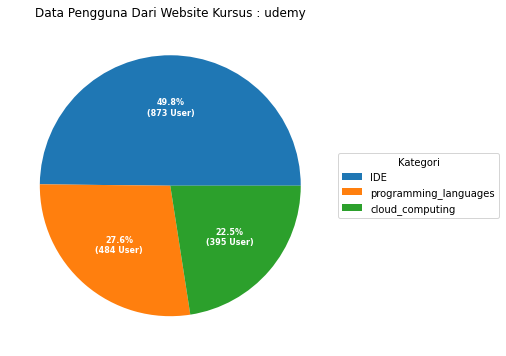

In [35]:
# DATA UDEMY
linkedIn = soal_2[(df['linkedIn'] == 'LinkedIn Learning')]
linkedIn = linkedIn[['IDE', 'programming_languages', 'cloud_computing', 'linkedIn']]  # type: ignore
linkedIn.count()

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

linkedIn = ["IDE                      873", "programming_languages     484", "cloud_computing           395"]
data = [float(x.split()[-1]) for x in linkedIn]
ingredients = [x.split()[0] for x in linkedIn]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} User)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.legend(wedges, ingredients, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Data Pengguna Dari Website Kursus : udemy")
plt.show()

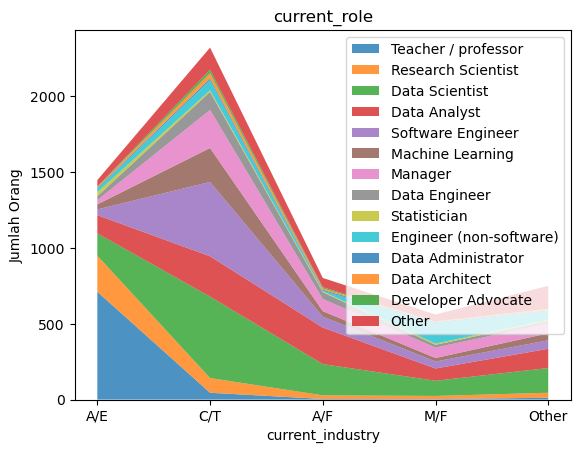

In [ ]:
# 3. Menampilkan data current_role berdasarkan current_industry dari 5 terbanyak.
soal_3 = df[['current_role', 'current_industry']]
# print(soal_3.current_role.value_counts())
# print(soal_3.current_industry.value_counts())
# soal_3.current_role.value_counts().head()
# soal_3.current_industry.value_counts().head()
# soal_3 = soal_3[soal_3['current_industry'] == 'Computers/Technology']
# soal_3[['current_role']].value_counts().head()

import numpy as np
import matplotlib.pyplot as plt
#['Academics/Education', 'Computers/Technology', 'Accounting/Finance', 'Manufacturing/Fabrication', 'Other']
current_industry = ['A/E', 'C/T', 'A/F', 'M/F', 'Other']
current_role = {
    'Teacher / professor': [711, 45, 4, 3, 12],
    'Research Scientist': [238, 97, 24, 21, 33],
    'Data Scientist': [147, 537, 206, 100, 163],
    'Data Analyst': [120, 266, 241, 81, 127],
    'Software Engineer': [38, 490, 72, 46, 56],
    'Machine Learning': [33, 224, 36, 23, 46],
    'Manager': [28, 251, 80, 69, 64],
    'Data Engineer': [26, 119, 45, 18, 19],
    'Statistician': [26, 10, 5, 8, 6],
    'Engineer (non-software)': [22, 67, 4, 135, 57],
    'Data Administrator': [6, 11, 7, 7, 5],
    'Data Architect': [6, 35, 9, 3, 9],
    'Developer Advocate': [3, 23, 8, 2, 2],
    'Other': [43, 146, 61, 45, 151]#
}

fig, ax = plt.subplots()
ax.stackplot(current_industry, current_role.values(), labels=current_role.keys(), alpha=0.8)
ax.legend(loc='upper right')
ax.set_title('current_role')
ax.set_xlabel('current_industry')
ax.set_ylabel('Jumlah Orang')

plt.show()

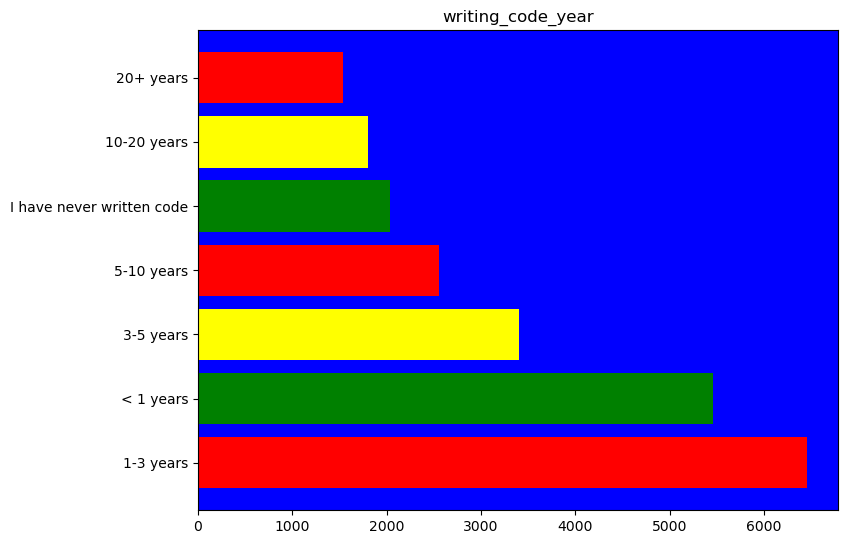

In [ ]:
# 4. Menampilkan data writing_code_year
# df[['writing_code_year', 'educational_status', 'current_role', 'current_industry']]
soal_4 = df.writing_code_year.value_counts()

import matplotlib.pyplot as plt
fig = plt.figure()
fig.patch.set_facecolor('white')  # type: ignore

ax = fig.add_axes([0,0,1,1])
segment = soal_4.index.tolist()
count = [i for i in soal_4]

bar_labels = ['red','green','yellow']
ax.barh(segment,count, label=bar_labels, color=bar_labels)
ax.set_title('writing_code_year')
ax.set_facecolor("blue")
plt.show()